In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_validate
from sklearn.covariance import EmpiricalCovariance
from sklearn.metrics import accuracy_score



QUESTION 2

2.3 Data Preparation

In [34]:
# Load the titanic dataset
titanic = pd.read_csv("titanic3.csv")
# Extract necessary columns
titanic = titanic[['age', 'sex', 'pclass', 'survived']]
# Impute missing values using mean
imputer = SimpleImputer(strategy='mean')
titanic['age'] = imputer.fit_transform(titanic[['age']])
# Convert categorical variables to numerical using one-hot encoding
titanic['sex'] = titanic['sex'].map({'female': 0, 'male': 1})

2.3 Fitting the classifier

In [43]:
# Extract features and target variable
X = titanic.drop('survived', axis=1)
y = titanic['survived']
# Fit the Decision Tree model without pruning
dt_model_before_pruning = DecisionTreeClassifier()
dt_model_before_pruning.fit(X, y)  # Fit the model


DecisionTreeClassifier()

2.4 Evaluation of the tree (before and after pruning) using cross validation 

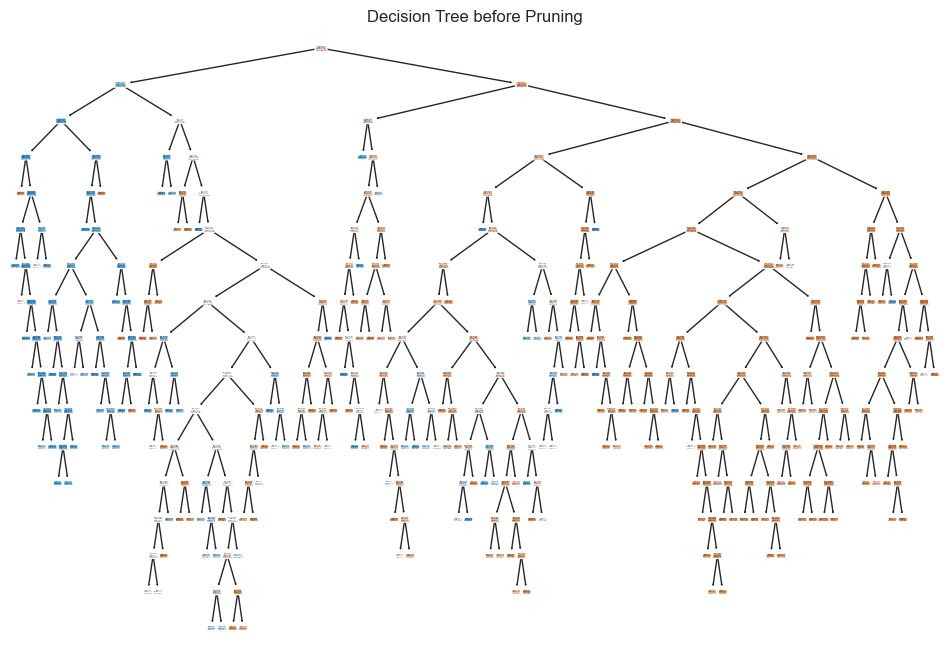

In-Sample Misclassification Error: 0.15355233002291824
Cross-Validated Misclassification Error: 0.3514228890643737


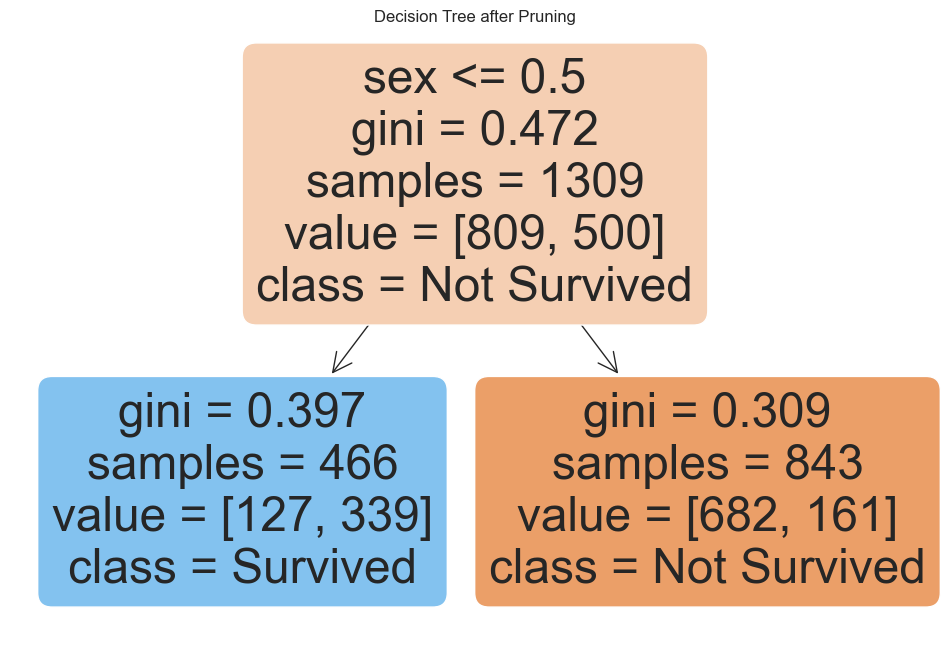


Cross-validation scores after pruning: [0.85114504 0.80916031 0.79770992 0.70992366 0.73180077]
Mean accuracy after pruning: 0.7799479395162471
classification error after pruning: 0.22005206048375292


In [53]:
# Plot the Decision Tree before pruning
plt.figure(figsize=(12, 8))
plot_tree(dt_model_before_pruning, feature_names=X.columns, filled=True, rounded=True)
plt.title("Decision Tree before Pruning")
plt.show()
# Calculate in-sample misclassification error
y_pred_train = dt_model_before_pruning.predict(X)
in_sample_error = 1 - accuracy_score(y, y_pred_train)
# Calculate cross-validated misclassification error
cv_error = 1 - np.mean(cross_val_score(dt_model_before_pruning, X, y, cv=5, scoring='accuracy'))
# Print results
print(f"In-Sample Misclassification Error: {in_sample_error}")
print(f"Cross-Validated Misclassification Error: {cv_error}")
# Fit the Decision Tree model with pruning 
dt_model_after_pruning = DecisionTreeClassifier(ccp_alpha=0.07, random_state=42)
dt_model_after_pruning.fit(X, y)  # Fit the model
# Evaluate the model using cross-validation after pruning
cv_scores_after_pruning = cross_val_score(dt_model_after_pruning, X, y, cv=5)  
# Plot the Decision Tree after pruning
plt.figure(figsize=(12, 8))
plot_tree(dt_model_after_pruning, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True, rounded=True)
plt.title("Decision Tree after Pruning")
plt.show()
print("\nCross-validation scores after pruning:", cv_scores_after_pruning)
print("Mean accuracy after pruning:", cv_scores_after_pruning.mean())
#classificatio errors
print("classification error after pruning:", 1-cv_scores_after_pruning.mean())

2.5 Compare the Final Tree with Logistic Regression:


In [50]:
# Logistic Regression
logreg = LogisticRegression(random_state=42)
logreg.fit(X,y)
scores=cross_val_score(logreg,X,y,cv=5)
accuracy_scores=scores.mean()
# Compare Decision Tree and Logistic Regression
print("Decision Tree Mean Accuracy (After Pruning):", cv_scores_after_pruning.mean())
print("Logistic Regression Mean Accuracy:", accuracy_scores)
print("Logistic Regression classification error :", 1 - accuracy_scores)



Decision Tree Mean Accuracy (After Pruning): 0.7799479395162471
Logistic Regression Mean Accuracy: 0.7027931326957386
Logistic Regression classification error : 0.2972068673042614


QUESTION 3

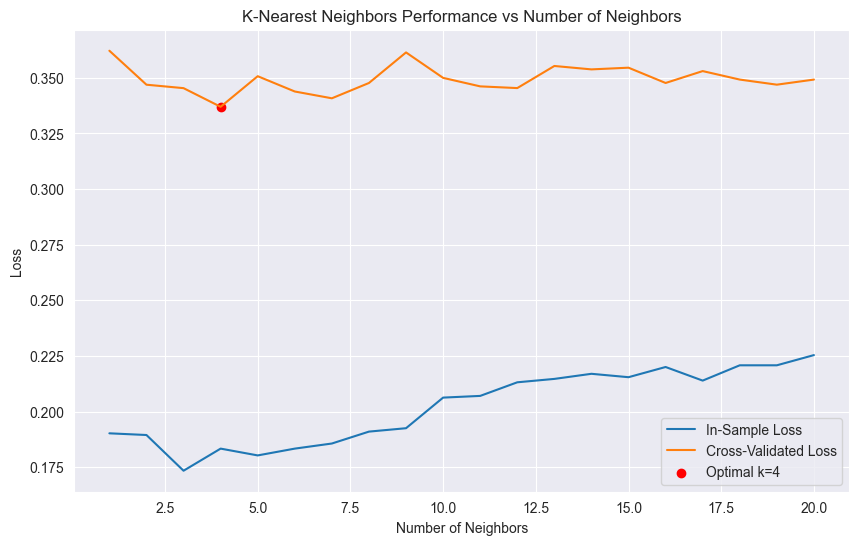

The optimal number of neighbors is: 4


In [38]:
# Create a range of neighbor values 
neighbors = list(range(1, 21)) 

# Initialize lists to store in-sample and cross-validated losses
in_sample_losses = []
cv_losses = []

# Fit the classifier and test different neighborhood sizes
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Compute in-sample loss
    knn.fit(X, y)
    in_sample_loss = np.mean(y != knn.predict(X))
    in_sample_losses.append(in_sample_loss)
    
    # Compute cross-validated loss
    scores = cross_validate(knn, X, y, cv=5, scoring='accuracy', return_train_score=False)
    cv_loss = 1 - np.mean(scores['test_score'])
    cv_losses.append(cv_loss)

# Find the optimal number of neighbors
optimal_k = neighbors[cv_losses.index(min(cv_losses))]

# Plot the graph of loss against the number of neighbors
plt.figure(figsize=(10, 6))
plt.plot(neighbors, in_sample_losses, label='In-Sample Loss')
plt.plot(neighbors, cv_losses, label='Cross-Validated Loss')
plt.scatter(optimal_k, min(cv_losses), color='red', marker='o', label=f'Optimal k={optimal_k}')

plt.title('K-Nearest Neighbors Performance vs Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Print the optimal number of neighbors
print(f"The optimal number of neighbors is: {optimal_k}")

In [47]:

# Define a list of distance metrics 
distance_metrics = ['chebyshev', 'euclidean', 'mahalanobis', 'hamming']

# Initialize lists to store KNN performance
knn_accuracies = []

# Evaluate KNN with different distance metrics
for metric in distance_metrics:
    if metric == 'mahalanobis':
        # Calculate the empirical covariance matrix
        covariance_matrix = EmpiricalCovariance().fit(X).covariance_
        knn = KNeighborsClassifier(n_neighbors=optimal_k, metric=metric, metric_params={'V': covariance_matrix})
    else:
        knn = KNeighborsClassifier(n_neighbors=optimal_k, metric=metric)

    scores = cross_validate(knn, X, y, cv=5, scoring='accuracy', return_train_score=False)
    knn_accuracies.append(np.mean(scores['test_score']))
# Compare the performance
for i, metric in enumerate(distance_metrics):
    print(f"KNN Accuracy with {metric} distance metric: {knn_accuracies[i]}")

KNN Accuracy with chebyshev distance metric: 0.6004796583896347
KNN Accuracy with euclidean distance metric: 0.6630809277295194
KNN Accuracy with mahalanobis distance metric: 0.6554561141820947
KNN Accuracy with hamming distance metric: 0.6142318153900149


In [39]:
# Initialize lists to store KNN and Logistic Regression performance
knn_accuracies = []
logreg_accuracies = []

# Fit KNN with optimal k
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn_scores = cross_validate(knn, X, y, cv=5, scoring='accuracy', return_train_score=False)
knn_accuracies.append(np.mean(knn_scores['test_score']))

# Fit Logistic Regression
logreg = LogisticRegression()
logreg_scores = cross_validate(logreg, X, y, cv=5, scoring='accuracy', return_train_score=False)
logreg_accuracies.append(np.mean(logreg_scores['test_score']))

# Compare the performance
print(f"KNN Accuracy with optimal k: {knn_accuracies[0]}")
print(f"Logistic Regression Accuracy: {np.mean(logreg_accuracies)}")

KNN Accuracy with optimal k: 0.6630809277295194
Logistic Regression Accuracy: 0.7027931326957386


QUESTION 4

4.1 Calculate the average of each feature for red and white wines separately and plot a bar graph.

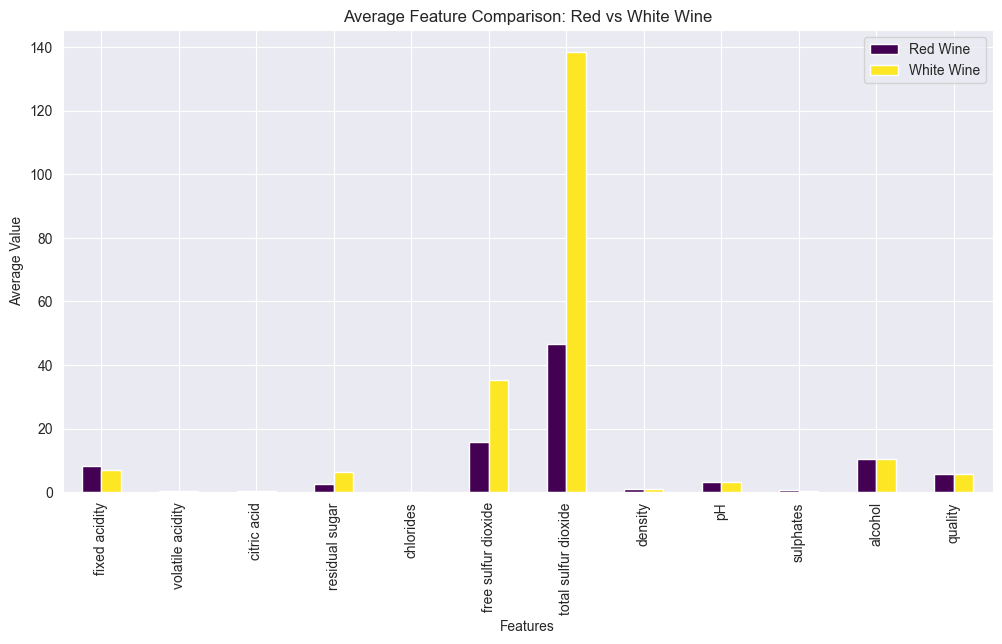

In [9]:
# Load datasets
red_wine = pd.read_csv("winequality-red.csv", sep=";")
white_wine = pd.read_csv("winequality-white.csv", sep=";")

# Calculate average for red wine
red_wine_avg = red_wine.mean()

# Calculate average for white wine
white_wine_avg = white_wine.mean()

# Combine the averages into a single DataFrame
avg_comparison = pd.DataFrame({'Red Wine': red_wine_avg, 'White Wine': white_wine_avg})

# Plotting bar graph
avg_comparison.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('Average Feature Comparison: Red vs White Wine')
plt.xlabel('Features')
plt.ylabel('Average Value')
plt.show()


4.2 Calculate correlation of features with the dependent variable.


In [10]:
# Calculate correlation for red wine
red_corr = red_wine.corr()['quality'].drop('quality')

# Calculate correlation for white wine
white_corr = white_wine.corr()['quality'].drop('quality')

print("Red Wine Correlation:")
print(red_corr)
print("\nWhite Wine Correlation:")
print(white_corr)

# Identify the most relevant feature based on correlation values
most_relevant_red = red_corr.abs().idxmax()
most_relevant_white = white_corr.abs().idxmax()

print(f"\nMost Relevant Feature for Red Wine: {most_relevant_red}")
print(f"Most Relevant Feature for White Wine: {most_relevant_white}")


Red Wine Correlation:
fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64

White Wine Correlation:
fixed acidity          -0.113663
volatile acidity       -0.194723
citric acid            -0.009209
residual sugar         -0.097577
chlorides              -0.209934
free sulfur dioxide     0.008158
total sulfur dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
Name: quality, dtype: float64

Most Relevant Feature for Red Wine: alcohol
Most Relevant Feature for White Wine: alcohol


4.3 Use Lasso and cross-validation to provide a plot of MSE for each wine type.

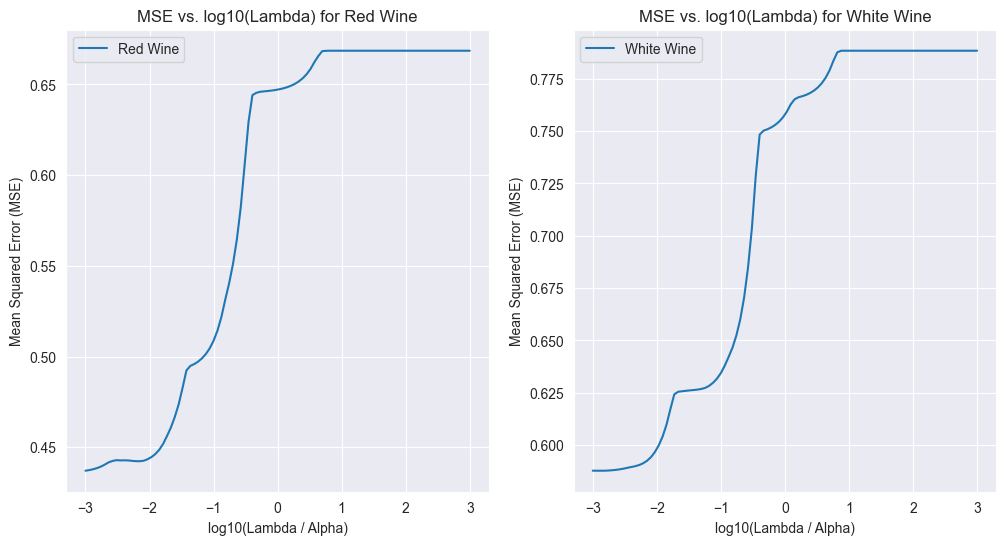

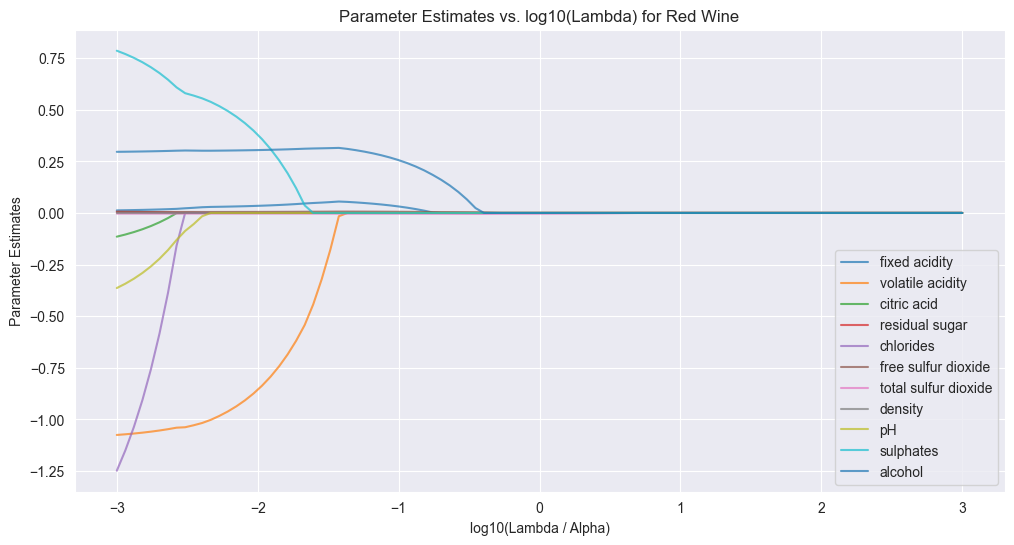

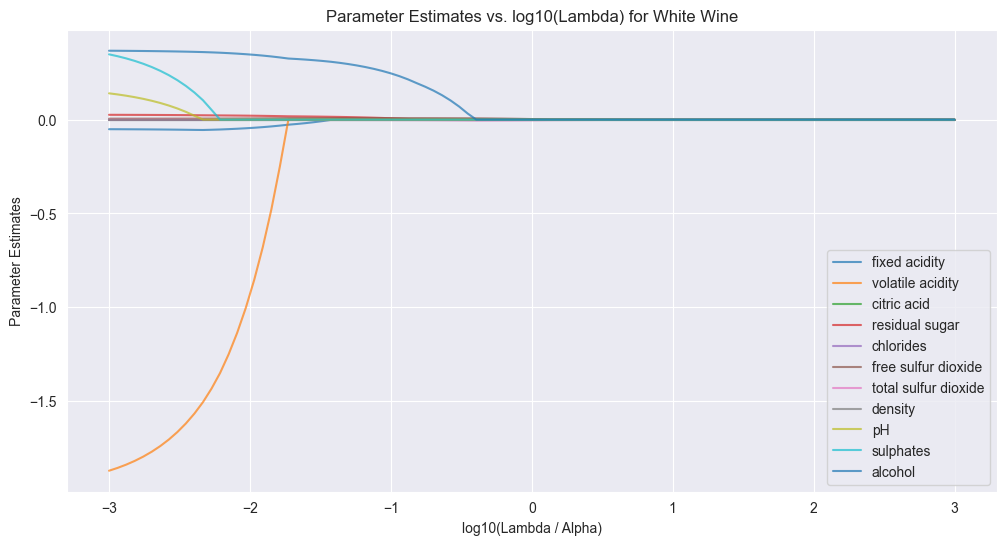

In [51]:
 #Red wine Lasso
X_red = red_wine.drop('quality', axis=1)
y_red = red_wine['quality']

# White wine Lasso
X_white = white_wine.drop('quality', axis=1)
y_white = white_wine['quality']

# Function to generate a range of lambda values
def generate_lambda_values(start=3, end=-3, num_values=100):
    return np.logspace(start, end, num_values)

# Generate a range of lambda values
lambda_values = generate_lambda_values()

# Lists to store MSE values for red and white wines
mse_values_red = []
mse_values_white = []

# Lists to store parameter estimates for red and white wines
coef_red = []
coef_white = []

# Build Lasso models and record MSE and parameter estimates
for alpha in lambda_values:
    #Lasso regression with cross-validation for red wine
    lasso_red = LassoCV(alphas=[alpha],cv=5)
    mse_red = -cross_val_score(lasso_red, X_red, y_red,scoring='neg_mean_squared_error').mean()
    mse_values_red.append(mse_red)
    
    # Fit Lasso model to get parameter estimates for red wine
    lasso_red.fit(X_red, y_red)
    coef_red.append(lasso_red.coef_)

    # Lasso regression with cross-validation for white wine
    lasso_white = LassoCV(alphas=[alpha],cv=5)
    mse_white = -cross_val_score(lasso_white, X_white, y_white,scoring='neg_mean_squared_error').mean()
    mse_values_white.append(mse_white)
    
    # Fit Lasso model to get parameter estimates for white wine
    lasso_white.fit(X_white, y_white)
    coef_white.append(lasso_white.coef_)

# Plotting MSE against Lambda for both red and white wines
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(np.log10(lambda_values), mse_values_red, label='Red Wine')
plt.xlabel('log10(Lambda / Alpha)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. log10(Lambda) for Red Wine')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(np.log10(lambda_values), mse_values_white, label='White Wine')
plt.xlabel('log10(Lambda / Alpha)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. log10(Lambda) for White Wine')
plt.legend()

plt.show()

# Plotting parameter estimates against Lambda for Red Wine
coef_red = np.array(coef_red).T
coef_white = np.array(coef_white).T

plt.figure(figsize=(12, 6))
for i, feature_name in enumerate(X_red.columns):
    plt.plot(np.log10(lambda_values), coef_red[i], label=f'{feature_name}', alpha=0.7)

plt.xlabel('log10(Lambda / Alpha)')
plt.ylabel('Parameter Estimates')
plt.title('Parameter Estimates vs. log10(Lambda) for Red Wine')
plt.legend()
plt.show()

# Plotting parameter estimates against Lambda for White Wine
plt.figure(figsize=(12, 6))
for i, feature_name in enumerate(X_white.columns):
    plt.plot(np.log10(lambda_values),coef_white[i],label=f'{feature_name}', alpha=0.7)

plt.xlabel('log10(Lambda / Alpha)')
plt.ylabel('Parameter Estimates')
plt.title('Parameter Estimates vs. log10(Lambda) for White Wine')
plt.legend()
plt.show()

4.3  (Continued) Provide a plot of parameter estimates versus lambda for Lasso.


In [12]:
# Print selected features for red wine
features_red = X_red.columns[lasso_red.coef_ != 0]
features_white = X_white.columns[lasso_white.coef_ != 0]

print(f"Selected features by LASSO for Red Wine:{features_red}")
print(f"Selected features by LASSO for white Wine:{features_white}")

# Set correlation threshold
correlation_threshold = 0.5  # Adjust the threshold as needed

# Get features based on correlation threshold
correlated_features_red = X_red.corr().abs().stack().reset_index().sort_values(0, ascending=False)
correlated_features_red = correlated_features_red[correlated_features_red['level_0'] != correlated_features_red['level_1']]
correlated_features_red = correlated_features_red[correlated_features_red[0] > correlation_threshold]['level_0'].unique()

correlated_features_white = X_white.corr().abs().stack().reset_index().sort_values(0, ascending=False)
correlated_features_white = correlated_features_white[correlated_features_white['level_0'] != correlated_features_white['level_1']]
correlated_features_white = correlated_features_white[correlated_features_white[0] > correlation_threshold]['level_0'].unique()

# Compare with LASSO-selected features
common_features_red = set(features_red).intersection(correlated_features_red)
common_features_white = set(features_white).intersection(correlated_features_white)

print("\nFeatures selected by Correlation Coefficient for Red Wine:", correlated_features_red)
print("Features selected by Correlation Coefficient for White Wine:", correlated_features_white)

print("\nCommon features between LASSO and Correlation Coefficient for Red Wine:", common_features_red)
print("Common features between LASSO and Correlation Coefficient for White Wine:", common_features_white)

Selected features by LASSO for Red Wine:Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH',
       'sulphates', 'alcohol'],
      dtype='object')
Selected features by LASSO for white Wine:Index(['fixed acidity', 'volatile acidity', 'residual sugar',
       'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates',
       'alcohol'],
      dtype='object')

Features selected by Correlation Coefficient for Red Wine: ['pH' 'fixed acidity' 'citric acid' 'density' 'total sulfur dioxide'
 'free sulfur dioxide' 'volatile acidity']
Features selected by Correlation Coefficient for White Wine: ['residual sugar' 'density' 'alcohol' 'free sulfur dioxide'
 'total sulfur dioxide']

Common features between LASSO and Correlation Coefficient for Red Wine: {'free sulfur dioxide', 'pH', 'fixed acidity', 'citric acid', 'total sulfur dioxide', 'volatile acidity'}
Common features between LASSO and Correla

4.4 Use the features identified by LASSO to construct a KNN regression model for red wine.


In [13]:
X_red_lasso = X_red[features_red]
# Split the data
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X_red_lasso, y_red, test_size=0.2, random_state=42)

# Construct KNN regression model
knn_model = KNeighborsRegressor()
knn_model.fit(X_red_train, y_red_train)

# Making Predictions
y_red_pred = knn_model.predict(X_red_test)

# Evaluate performance using mse and r2
mse_knn = mean_squared_error(y_red_test, y_red_pred)
r2_knn = r2_score(y_red_test, y_red_pred)

#Displaying results
print(f"MSE of KNN Model for Red Wine: {mse_knn}")
print(f"R^2 of KNN Model for Red Wine: {r2_knn}")

MSE of KNN Model for Red Wine: 0.5319999999999999
R^2 of KNN Model for Red Wine: 0.18592925775938085


4.5 Choose between linear regression model and KNN model, based on MSE and R2 values.


In [14]:
# Construct Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_red_train, y_red_train)

# Predictions
y_red_pred_linear = linear_model.predict(X_red_test)

# Evaluate performance for linear regression
mse_linear = mean_squared_error(y_red_test, y_red_pred_linear)
r2_linear = r2_score(y_red_test, y_red_pred_linear)

print("MSE of Linear Regression Model for Red Wine:", mse_linear)
print("R^2 of Linear Regression Model for Red Wine:", r2_linear)

MSE of Linear Regression Model for Red Wine: 0.3905576238507958
R^2 of Linear Regression Model for Red Wine: 0.40236553621062054
